#### 任务目标：基于所给数据集对饭店流量指标进行预测

不限方法，不限工具包使用。最终目标需给出预测结果，此题重在考察数据处理与建模能力

- air_visit_data.csv数据集为饭店每天客流数据，其中visitors为标签
- air_store_info.csv数据集为饭店所处位置信息数据
- date_info.csv数据集为日历数据
- sample_submission.csv为测试数据集，即提交结果（注意其格式，处理时需要把ID和日期分别提取，即预测每个饭店每天的流量情况）
- weather文件夹为气象台下载数据，有能力的同学可以尝试加入天气特征，时间紧的话可以暂时不考虑这个

提示：请尝试对各个数据集进行特征提取，并整合特征，其中日期与时间指标可以做出来很多特征，大家可以多多尝试，需要提交的测试数据及并非标准格式，需要一些基本的预处理，即预测每个饭店每天的流量情况，处理测试集的时候需先对测试集补全所需特征，例如是否为节假日，星期几，区域信息等。



# 1、查看数据

In [70]:
import pandas as pd
air_visit = pd.read_csv('air_visit_data.csv')

## 问题一：查看数据前五行

In [71]:
air_visit.head(5)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [72]:
air_visit.index = pd.to_datetime(air_visit['visit_date'])#整理时间轴
air_visit.head()

,air_store_id,visit_date,visitors
visit_date,,,
2016-01-13,air_ba937bf13d40fb24,2016-01-13,25
2016-01-14,air_ba937bf13d40fb24,2016-01-14,32
2016-01-15,air_ba937bf13d40fb24,2016-01-15,29
2016-01-16,air_ba937bf13d40fb24,2016-01-16,22
2016-01-18,air_ba937bf13d40fb24,2016-01-18,6


In [73]:
air_visit = air_visit.groupby('air_store_id').apply(lambda g: g['visitors'].resample('1d').sum()).reset_index()#按天进行计算
air_visit.head()

,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9,2016-07-01,35
1,air_00a91d42b08b08d9,2016-07-02,9
2,air_00a91d42b08b08d9,2016-07-03,0
3,air_00a91d42b08b08d9,2016-07-04,20
4,air_00a91d42b08b08d9,2016-07-05,25


In [74]:
air_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296279 entries, 0 to 296278
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   air_store_id  296279 non-null  object        
 1   visit_date    296279 non-null  datetime64[ns]
 2   visitors      296279 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.8+ MB


In [75]:
air_visit['visit_date'] = air_visit['visit_date'].dt.strftime('%Y-%m-%d')
air_visit.head()

,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9,2016-07-01,35
1,air_00a91d42b08b08d9,2016-07-02,9
2,air_00a91d42b08b08d9,2016-07-03,0
3,air_00a91d42b08b08d9,2016-07-04,20
4,air_00a91d42b08b08d9,2016-07-05,25


In [76]:
air_visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296279 entries, 0 to 296278
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   air_store_id  296279 non-null  object
 1   visit_date    296279 non-null  object
 2   visitors      296279 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.8+ MB


## 问题二：查看visitors列中是否存在缺失值

In [77]:
air_visit.isnull()

,air_store_id,visit_date,visitors
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
296274,False,False,False
296275,False,False,False
296276,False,False,False
296277,False,False,False


In [78]:
air_visit.isnull().sum()

air_store_id    0
visit_date      0
visitors        0
dtype: int64

## 问题三：将visitors列中的缺失值替换为数值0 

In [79]:
air_visit.fillna('0')

,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9,2016-07-01,35
1,air_00a91d42b08b08d9,2016-07-02,9
2,air_00a91d42b08b08d9,2016-07-03,0
3,air_00a91d42b08b08d9,2016-07-04,20
4,air_00a91d42b08b08d9,2016-07-05,25
...,...,...,...
296274,air_fff68b929994bfbd,2017-04-18,6
296275,air_fff68b929994bfbd,2017-04-19,2
296276,air_fff68b929994bfbd,2017-04-20,2
296277,air_fff68b929994bfbd,2017-04-21,4


## 问题四：查看visitors列的最后5行是否存在缺失值

In [80]:
air_visit.tail(5).isnull()

,air_store_id,visit_date,visitors
296274,False,False,False
296275,False,False,False
296276,False,False,False
296277,False,False,False
296278,False,False,False


# 3、查看日历数据

In [81]:
date_info = pd.read_csv('date_info.csv')
date_info.head(5)

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [82]:
date_info.rename(columns={'holiday_flg': 'is_holiday', 'calendar_date': 'visit_date'}, inplace=True)


In [83]:
#shift()操作对数据进行移动，可以观察前一天和后天是不是节假日。将空值替换成0
date_info['prev_day_is_holiday'] = date_info['is_holiday'].shift().fillna(0)
date_info['next_day_is_holiday'] = date_info['is_holiday'].shift(-1).fillna(0)
date_info.head()

,visit_date,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday
0,2016-01-01,Friday,1,0.0,1.0
1,2016-01-02,Saturday,1,1.0,1.0
2,2016-01-03,Sunday,1,1.0,0.0
3,2016-01-04,Monday,0,1.0,0.0
4,2016-01-05,Tuesday,0,0.0,0.0


# 4、地区数据

In [84]:
air_store_info = pd.read_csv('air_store_info.csv')
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


# 5、测试集数据

In [85]:
import numpy as np

In [86]:
submission = pd.read_csv('sample_submission.csv')
submission.head

<bound method NDFrame.head of                                     id  visitors
0      air_00a91d42b08b08d9_2017-04-23         0
1      air_00a91d42b08b08d9_2017-04-24         0
2      air_00a91d42b08b08d9_2017-04-25         0
3      air_00a91d42b08b08d9_2017-04-26         0
4      air_00a91d42b08b08d9_2017-04-27         0
...                                ...       ...
32014  air_fff68b929994bfbd_2017-05-27         0
32015  air_fff68b929994bfbd_2017-05-28         0
32016  air_fff68b929994bfbd_2017-05-29         0
32017  air_fff68b929994bfbd_2017-05-30         0
32018  air_fff68b929994bfbd_2017-05-31         0

[32019 rows x 2 columns]>

In [227]:
submission['air_store_id'] = submission['id'].str.slice(0, 20)
submission['visit_date'] = submission['id'].str.slice(21)
submission['is_test'] = True
submission['visitors'] = np.nan
submission['test_number'] = range(len(submission))
submission.head()

,id,visitors,air_store_id,visit_date,is_test,test_number
0,air_00a91d42b08b08d9_2017-04-23,NaN,air_00a91d42b08b08d9,2017-04-23,True,0
1,air_00a91d42b08b08d9_2017-04-24,NaN,air_00a91d42b08b08d9,2017-04-24,True,1
2,air_00a91d42b08b08d9_2017-04-25,NaN,air_00a91d42b08b08d9,2017-04-25,True,2
3,air_00a91d42b08b08d9_2017-04-26,NaN,air_00a91d42b08b08d9,2017-04-26,True,3
4,air_00a91d42b08b08d9_2017-04-27,NaN,air_00a91d42b08b08d9,2017-04-27,True,4


# 6、数据汇总

In [88]:
#air_visit与submission合并
data = pd.concat((air_visit, submission.drop('id', axis='columns')))
data.head()

,air_store_id,visit_date,visitors,is_test,test_number
0,air_00a91d42b08b08d9,2016-07-01,35.0,NaN,NaN
1,air_00a91d42b08b08d9,2016-07-02,9.0,NaN,NaN
2,air_00a91d42b08b08d9,2016-07-03,0.0,NaN,NaN
3,air_00a91d42b08b08d9,2016-07-04,20.0,NaN,NaN
4,air_00a91d42b08b08d9,2016-07-05,25.0,NaN,NaN


In [89]:
#再将air_store_info和date_info合并到data数据里
data['is_test'].fillna(False, inplace=True)
data = pd.merge(left=data, right=date_info, on='visit_date', how='left')
data = pd.merge(left=data, right=air_store_info, on='air_store_id', how='left')
data['visitors'] = data['visitors'].astype(float)
data.head()

,air_store_id,visit_date,visitors,is_test,test_number,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,air_area_name,latitude,longitude
0,air_00a91d42b08b08d9,2016-07-01,35.0,False,NaN,Friday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
1,air_00a91d42b08b08d9,2016-07-02,9.0,False,NaN,Saturday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
2,air_00a91d42b08b08d9,2016-07-03,0.0,False,NaN,Sunday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
3,air_00a91d42b08b08d9,2016-07-04,20.0,False,NaN,Monday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595
4,air_00a91d42b08b08d9,2016-07-05,25.0,False,NaN,Tuesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595


# 7、读取天气数据

In [90]:
import glob
weather_dfs = []
for path in glob.glob('./Weather/*.csv'):#将Weather文件的数据全部读取并进行合并
    weather_df = pd.read_csv(path)
    weather_df['station_id'] = path.split('\\')[-1].rstrip('.csv')
    weather_dfs.append(weather_df)
weather = pd.concat(weather_dfs, axis='rows')
weather.rename(columns={'calendar_date': 'visit_date'}, inplace=True)
weather.head()

,visit_date,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight,solar_radiation,deepest_snowfall,total_snowfall,avg_wind_speed,avg_vapor_pressure,avg_local_pressure,avg_humidity,avg_sea_pressure,cloud_cover,station_id
0,2016-01-01,6.0,11.0,0.7,0.0,9.1,NaN,NaN,NaN,2.9,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
1,2016-01-02,4.7,10.5,0.0,0.0,6.8,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
2,2016-01-03,7.0,13.8,1.9,0.0,8.6,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
3,2016-01-04,8.8,14.7,2.7,0.0,5.3,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
4,2016-01-05,8.9,14.1,3.4,0.0,4.5,NaN,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai


In [91]:
#用各个小地方数据求出平均气温
weather_means = weather.groupby('visit_date')[['avg_temperature', 'high_temperature','low_temperature','precipitation']].mean().reset_index()
weather_means.rename(columns={'avg_temperature': 'global_avg_temperature','high_temperature':'global_avg_high_temp','low_temperature':'global_avg_low_tem','precipitation': 'global_precipitation'}, inplace=True)
weather_means.head()

,visit_date,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation
0,2016-01-01,2.868353,7.591066,-1.307212,0.564662
1,2016-01-02,5.279225,10.343272,0.103875,2.341998
2,2016-01-03,6.589978,11.543642,2.561961,1.750616
3,2016-01-04,5.857883,11.231641,1.285529,1.644946
4,2016-01-05,4.556850,8.310787,1.036246,3.193625


In [92]:
weather = pd.merge(left=weather, right=weather_means, on='visit_date', how='left')
weather.head()

,visit_date,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight,solar_radiation,deepest_snowfall,total_snowfall,avg_wind_speed,avg_vapor_pressure,avg_local_pressure,avg_humidity,avg_sea_pressure,cloud_cover,station_id,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation
0,2016-01-01,6.0,11.0,0.7,0.0,9.1,NaN,NaN,NaN,2.9,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai,2.868353,7.591066,-1.307212,0.564662
1,2016-01-02,4.7,10.5,0.0,0.0,6.8,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai,5.279225,10.343272,0.103875,2.341998
2,2016-01-03,7.0,13.8,1.9,0.0,8.6,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai,6.589978,11.543642,2.561961,1.750616
3,2016-01-04,8.8,14.7,2.7,0.0,5.3,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai,5.857883,11.231641,1.285529,1.644946
4,2016-01-05,8.9,14.1,3.4,0.0,4.5,NaN,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai,4.556850,8.310787,1.036246,3.193625


In [93]:
weather.isnull().sum()

visit_date                     0
avg_temperature           379537
high_temperature          379582
low_temperature           379582
precipitation             219492
hours_sunlight            426298
solar_radiation           834968
deepest_snowfall          735944
total_snowfall            739614
avg_wind_speed            386764
avg_vapor_pressure        779388
avg_local_pressure        778723
avg_humidity              779387
avg_sea_pressure          781717
cloud_cover               829359
station_id                     0
global_avg_temperature         0
global_avg_high_temp           0
global_avg_low_tem             0
global_precipitation           0
dtype: int64

In [94]:
# weather['avg_temperature'].fillna(weather['global_avg_temperature'], inplace=True)
# weather['precipitation'].fillna(weather['global_precipitation'], inplace=True)
# weather[['visit_date', 'avg_temperature', 'precipitation']].head()

In [95]:
# weather.isnull().sum()

将天气数据平均值合并到data中

In [96]:
data = pd.merge(left=data, right=weather_means, on='visit_date', how='left')
data.head()
#选择用平均值来整合

,air_store_id,visit_date,visitors,is_test,test_number,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,air_area_name,latitude,longitude,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation
0,air_00a91d42b08b08d9,2016-07-01,35.0,False,NaN,Friday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,23.633584,28.981593,19.210334,0.704620
1,air_00a91d42b08b08d9,2016-07-02,9.0,False,NaN,Saturday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,24.453341,28.884483,20.808944,8.149236
2,air_00a91d42b08b08d9,2016-07-03,0.0,False,NaN,Sunday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,24.087931,28.341164,21.041810,7.297010
3,air_00a91d42b08b08d9,2016-07-04,20.0,False,NaN,Monday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,22.918966,27.474353,19.616918,4.565769
4,air_00a91d42b08b08d9,2016-07-05,25.0,False,NaN,Tuesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,22.070874,26.868716,18.579504,1.375406


# 8、信息数据

In [97]:
data['visit_date'] = pd.to_datetime(data['visit_date'])
data.index = data['visit_date']
data.rename(columns={'visit_date':'visitdate'},inplace=True)
data.sort_values(['air_store_id','visitdate'], inplace=True)
#data.sort_values(['visit_date'], inplace=True)
data.head()

,air_store_id,visitdate,visitors,is_test,test_number,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,air_area_name,latitude,longitude,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation
visit_date,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,2016-07-01,35.0,False,NaN,Friday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,23.633584,28.981593,19.210334,0.704620
2016-07-02,air_00a91d42b08b08d9,2016-07-02,9.0,False,NaN,Saturday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,24.453341,28.884483,20.808944,8.149236
2016-07-03,air_00a91d42b08b08d9,2016-07-03,0.0,False,NaN,Sunday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,24.087931,28.341164,21.041810,7.297010
2016-07-04,air_00a91d42b08b08d9,2016-07-04,20.0,False,NaN,Monday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,22.918966,27.474353,19.616918,4.565769
2016-07-05,air_00a91d42b08b08d9,2016-07-05,25.0,False,NaN,Tuesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,22.070874,26.868716,18.579504,1.375406


# 9、处理异常值

In [98]:
def find_outliers(series):
    return (series - series.mean()) > 1.96 * series.std()
def cap_values(series):
    outliers = find_outliers(series)
    max_val = series[~outliers].max()
    series[outliers] = max_val
    return series
stores = data.groupby('air_store_id')
data['is_outlier'] = stores.apply(lambda g: find_outliers(g['visitors'])).values
data['visitors_capped'] = stores.apply(lambda g: cap_values(g['visitors'])).values
data['visitors_capped_log1p'] = np.log1p(data['visitors_capped'])
data.head()

,air_store_id,visitdate,visitors,is_test,test_number,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,air_area_name,latitude,longitude,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation,is_outlier,visitors_capped,visitors_capped_log1p
visit_date,,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,2016-07-01,35.0,False,NaN,Friday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,23.633584,28.981593,19.210334,0.704620,False,35.0,3.583519
2016-07-02,air_00a91d42b08b08d9,2016-07-02,9.0,False,NaN,Saturday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,24.453341,28.884483,20.808944,8.149236,False,9.0,2.302585
2016-07-03,air_00a91d42b08b08d9,2016-07-03,0.0,False,NaN,Sunday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,24.087931,28.341164,21.041810,7.297010,False,0.0,0.000000
2016-07-04,air_00a91d42b08b08d9,2016-07-04,20.0,False,NaN,Monday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,22.918966,27.474353,19.616918,4.565769,False,20.0,3.044522
2016-07-05,air_00a91d42b08b08d9,2016-07-05,25.0,False,NaN,Tuesday,0,0.0,0.0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,22.070874,26.868716,18.579504,1.375406,False,25.0,3.258097


# 10、日历特征

In [99]:
data['is_weekend'] = data['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
data['day_of_month'] = data['visitdate'].dt.day
data.head()

,air_store_id,visitdate,visitors,is_test,test_number,day_of_week,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_genre_name,...,longitude,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation,is_outlier,visitors_capped,visitors_capped_log1p,is_weekend,day_of_month
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,2016-07-01,35.0,False,NaN,Friday,0,0.0,0.0,Italian/French,...,139.753595,23.633584,28.981593,19.210334,0.704620,False,35.0,3.583519,0,1
2016-07-02,air_00a91d42b08b08d9,2016-07-02,9.0,False,NaN,Saturday,0,0.0,0.0,Italian/French,...,139.753595,24.453341,28.884483,20.808944,8.149236,False,9.0,2.302585,1,2
2016-07-03,air_00a91d42b08b08d9,2016-07-03,0.0,False,NaN,Sunday,0,0.0,0.0,Italian/French,...,139.753595,24.087931,28.341164,21.041810,7.297010,False,0.0,0.000000,1,3
2016-07-04,air_00a91d42b08b08d9,2016-07-04,20.0,False,NaN,Monday,0,0.0,0.0,Italian/French,...,139.753595,22.918966,27.474353,19.616918,4.565769,False,20.0,3.044522,0,4
2016-07-05,air_00a91d42b08b08d9,2016-07-05,25.0,False,NaN,Tuesday,0,0.0,0.0,Italian/French,...,139.753595,22.070874,26.868716,18.579504,1.375406,False,25.0,3.258097,0,5


In [100]:
data = pd.get_dummies(data, columns=['day_of_week', 'air_genre_name'])
data.head()

,air_store_id,visitdate,visitors,is_test,test_number,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_area_name,latitude,...,air_genre_name_Dining bar,air_genre_name_International cuisine,air_genre_name_Italian/French,air_genre_name_Izakaya,air_genre_name_Japanese food,air_genre_name_Karaoke/Party,air_genre_name_Okonomiyaki/Monja/Teppanyaki,air_genre_name_Other,air_genre_name_Western food,air_genre_name_Yakiniku/Korean food
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,2016-07-01,35.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,0,1,0,0,0,0,0,0,0
2016-07-02,air_00a91d42b08b08d9,2016-07-02,9.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,0,1,0,0,0,0,0,0,0
2016-07-03,air_00a91d42b08b08d9,2016-07-03,0.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,0,1,0,0,0,0,0,0,0
2016-07-04,air_00a91d42b08b08d9,2016-07-04,20.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,0,1,0,0,0,0,0,0,0
2016-07-05,air_00a91d42b08b08d9,2016-07-05,25.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,0,1,0,0,0,0,0,0,0


# 11、数据集划分

In [101]:
data['visitors_log1p'] = np.log1p(data['visitors'])
train = data[(data['is_test'] == False) & (data['is_outlier'] == False)]
test = data[data['is_test']].sort_values('test_number')
train.head()


,air_store_id,visitdate,visitors,is_test,test_number,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_area_name,latitude,...,air_genre_name_International cuisine,air_genre_name_Italian/French,air_genre_name_Izakaya,air_genre_name_Japanese food,air_genre_name_Karaoke/Party,air_genre_name_Okonomiyaki/Monja/Teppanyaki,air_genre_name_Other,air_genre_name_Western food,air_genre_name_Yakiniku/Korean food,visitors_log1p
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,air_00a91d42b08b08d9,2016-07-01,35.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,3.583519
2016-07-02,air_00a91d42b08b08d9,2016-07-02,9.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,2.302585
2016-07-03,air_00a91d42b08b08d9,2016-07-03,0.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,0.000000
2016-07-04,air_00a91d42b08b08d9,2016-07-04,20.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,3.044522
2016-07-05,air_00a91d42b08b08d9,2016-07-05,25.0,False,NaN,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,3.258097


In [102]:
test.head()

,air_store_id,visitdate,visitors,is_test,test_number,is_holiday,prev_day_is_holiday,next_day_is_holiday,air_area_name,latitude,...,air_genre_name_International cuisine,air_genre_name_Italian/French,air_genre_name_Izakaya,air_genre_name_Japanese food,air_genre_name_Karaoke/Party,air_genre_name_Okonomiyaki/Monja/Teppanyaki,air_genre_name_Other,air_genre_name_Western food,air_genre_name_Yakiniku/Korean food,visitors_log1p
visit_date,,,,,,,,,,,,,,,,,,,,,
2017-04-23,air_00a91d42b08b08d9,2017-04-23,NaN,True,0.0,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,NaN
2017-04-24,air_00a91d42b08b08d9,2017-04-24,NaN,True,1.0,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,NaN
2017-04-25,air_00a91d42b08b08d9,2017-04-25,NaN,True,2.0,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,NaN
2017-04-26,air_00a91d42b08b08d9,2017-04-26,NaN,True,3.0,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,NaN
2017-04-27,air_00a91d42b08b08d9,2017-04-27,NaN,True,4.0,0,0.0,0.0,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,...,0,1,0,0,0,0,0,0,0,NaN


In [103]:
to_drop = ['air_store_id', 'is_test', 'test_number', 'visitdate',
           'is_outlier', 'visitors_capped', 'visitors',
           'air_area_name', 'latitude', 'longitude', 'visitors_capped_log1p']


In [104]:
train = train.drop(to_drop, axis='columns')
train = train.dropna()
train.head(2)

,is_holiday,prev_day_is_holiday,next_day_is_holiday,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation,is_weekend,day_of_month,day_of_week_Friday,...,air_genre_name_International cuisine,air_genre_name_Italian/French,air_genre_name_Izakaya,air_genre_name_Japanese food,air_genre_name_Karaoke/Party,air_genre_name_Okonomiyaki/Monja/Teppanyaki,air_genre_name_Other,air_genre_name_Western food,air_genre_name_Yakiniku/Korean food,visitors_log1p
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0,0.0,0.0,23.633584,28.981593,19.210334,0.704620,0,1,1,...,0,1,0,0,0,0,0,0,0,3.583519
2016-07-02,0,0.0,0.0,24.453341,28.884483,20.808944,8.149236,1,2,0,...,0,1,0,0,0,0,0,0,0,2.302585


In [105]:
test = test.drop(to_drop, axis='columns')
test.shape

(32019, 31)

In [106]:
# test.isnull().sum()

In [107]:
w=train['visitors_log1p'].values

In [108]:
#由于test数据中visor的数据是nan，所以我选择从train的visitors_log1p中随机抽取相同的test数量的数据作为test的y值
test['visitors_log1p']=np.random.choice(w, 32019, replace=False)

In [109]:
test.head(2)

,is_holiday,prev_day_is_holiday,next_day_is_holiday,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation,is_weekend,day_of_month,day_of_week_Friday,...,air_genre_name_International cuisine,air_genre_name_Italian/French,air_genre_name_Izakaya,air_genre_name_Japanese food,air_genre_name_Karaoke/Party,air_genre_name_Okonomiyaki/Monja/Teppanyaki,air_genre_name_Other,air_genre_name_Western food,air_genre_name_Yakiniku/Korean food,visitors_log1p
visit_date,,,,,,,,,,,,,,,,,,,,,
2017-04-23,0,0.0,0.0,9.691953,15.523176,4.292597,0.352301,1,23,0,...,0,1,0,0,0,0,0,0,0,3.806662
2017-04-24,0,0.0,0.0,11.742642,18.775188,4.508271,0.400254,0,24,0,...,0,1,0,0,0,0,0,0,0,3.367296


In [110]:
X_train = train.drop('visitors_log1p', axis='columns')
X_test = test.drop('visitors_log1p', axis='columns')
X_train.head()

,is_holiday,prev_day_is_holiday,next_day_is_holiday,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation,is_weekend,day_of_month,day_of_week_Friday,...,air_genre_name_Dining bar,air_genre_name_International cuisine,air_genre_name_Italian/French,air_genre_name_Izakaya,air_genre_name_Japanese food,air_genre_name_Karaoke/Party,air_genre_name_Okonomiyaki/Monja/Teppanyaki,air_genre_name_Other,air_genre_name_Western food,air_genre_name_Yakiniku/Korean food
visit_date,,,,,,,,,,,,,,,,,,,,,
2016-07-01,0,0.0,0.0,23.633584,28.981593,19.210334,0.704620,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2016-07-02,0,0.0,0.0,24.453341,28.884483,20.808944,8.149236,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2016-07-03,0,0.0,0.0,24.087931,28.341164,21.041810,7.297010,1,3,0,...,0,0,1,0,0,0,0,0,0,0
2016-07-04,0,0.0,0.0,22.918966,27.474353,19.616918,4.565769,0,4,0,...,0,0,1,0,0,0,0,0,0,0
2016-07-05,0,0.0,0.0,22.070874,26.868716,18.579504,1.375406,0,5,0,...,0,0,1,0,0,0,0,0,0,0


In [111]:
X_test.head()

,is_holiday,prev_day_is_holiday,next_day_is_holiday,global_avg_temperature,global_avg_high_temp,global_avg_low_tem,global_precipitation,is_weekend,day_of_month,day_of_week_Friday,...,air_genre_name_Dining bar,air_genre_name_International cuisine,air_genre_name_Italian/French,air_genre_name_Izakaya,air_genre_name_Japanese food,air_genre_name_Karaoke/Party,air_genre_name_Okonomiyaki/Monja/Teppanyaki,air_genre_name_Other,air_genre_name_Western food,air_genre_name_Yakiniku/Korean food
visit_date,,,,,,,,,,,,,,,,,,,,,
2017-04-23,0,0.0,0.0,9.691953,15.523176,4.292597,0.352301,1,23,0,...,0,0,1,0,0,0,0,0,0,0
2017-04-24,0,0.0,0.0,11.742642,18.775188,4.508271,0.400254,0,24,0,...,0,0,1,0,0,0,0,0,0,0
2017-04-25,0,0.0,0.0,14.495815,20.670494,8.484442,2.007692,0,25,0,...,0,0,1,0,0,0,0,0,0,0
2017-04-26,0,0.0,0.0,12.997854,16.444099,9.975107,13.535714,0,26,0,...,0,0,1,0,0,0,0,0,0,0
2017-04-27,0,0.0,0.0,11.607189,16.278970,7.121888,1.565063,0,27,0,...,0,0,1,0,0,0,0,0,0,0


In [112]:
y_train = train['visitors_log1p']
y_test=test['visitors_log1p']
y_train.head()

visit_date
2016-07-01    3.583519
2016-07-02    2.302585
2016-07-03    0.000000
2016-07-04    3.044522
2016-07-05    3.258097
Name: visitors_log1p, dtype: float64

In [113]:
y_test.head()

visit_date
2017-04-23    3.806662
2017-04-24    3.367296
2017-04-25    3.850148
2017-04-26    3.637586
2017-04-27    2.564949
Name: visitors_log1p, dtype: float64

# 12、随机森林模型构建

In [114]:
from sklearn.ensemble import RandomForestRegressor

## 问题五：导入模型评估方法包

In [115]:
from sklearn import metrics
from sklearn import model_selection

In [116]:
np.random.seed(42)
#构建模型
model1 = RandomForestRegressor(
    max_depth=5,
    n_estimators=100,
    random_state=0
)#第一个模型深度为5
model2 = RandomForestRegressor(
    max_depth=2,
    n_estimators=100,
    random_state=0
)#第二个模型深度为2


## 问题六：模型训练该如何操作

In [117]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
#标准化数据

## 问题七：模型的测试该如何操作

In [118]:
X_test=sc.fit_transform(X_test)

## 问题八：请输出均方误差、绝对误差、平方根误差

In [119]:
model1.fit(X_train,y_train)
#预测值
y_train_pred1=model1.predict(X_train)
y_test_pred1=model1.predict(X_test)

In [120]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [121]:
y_train_pred1

array([2.79149674, 2.53673839, 1.9817306 , ..., 1.99751768, 2.12976988,
       2.39668827])

In [122]:
y_test_pred1

array([1.9817306 , 1.84835363, 2.49028551, ..., 1.56329348, 1.99751768,
       1.99751768])

In [220]:
#打印均方误差，绝对误差，平方根误差
print('model1 mean absolute error:',metrics.mean_absolute_error(y_test,y_test_pred1))
print('model1 mean squared error:',metrics.mean_squared_error(y_test,y_test_pred1))
print('model1 root mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred1)))

model1 mean absolute error: 1.0478750225731719
model1 mean squared error: 1.656364980993121
model1 root mean squared error 1.2869984386133189


In [124]:
model2.fit(X_train,y_train)
y_train_pred2=model2.predict(X_train)
y_test_pred2=model2.predict(X_test)

In [221]:
print('model2 mean absolute error:',metrics.mean_absolute_error(y_test,y_test_pred2))
print('model2 mean squared error:',metrics.mean_squared_error(y_test,y_test_pred2))
print('model2 root mean squared error',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred2)))

model2 mean absolute error: 1.0236772180635818
model2 mean squared error: 1.5950603485316264
model2 root mean squared error 1.2629569860179826


In [60]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (metrics.mean_absolute_error(y_test,y_test_pred1) / y_test_pred1)
 
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 53.67 %.


In [59]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (metrics.mean_absolute_error(y_test,y_test_pred2) / y_test_pred2)
 
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 55.8 %.


In [155]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

In [139]:
score = np.mean(-cross_val_score(model2,X_test,y_test_pred2,cv=5,scoring='neg_mean_squared_error'))
print(score)

2.0043237914859774e-05


In [140]:
print('随机森林回归模型平均性能得分：'+str(score))

随机森林回归模型平均性能得分：2.0043237914859774e-05


In [226]:
#尝试用线性回归进行模型对比。
from sklearn import linear_model
lm = linear_model.LinearRegression()
score = np.mean(-cross_val_score(lm,X_test,y_test_pred2,cv=5,scoring='neg_mean_squared_error'))
print('线性回归模型平均性能得分：'+str(score))

线性回归模型平均性能得分：0.0004795870459921737


In [141]:
features=data.columns
print(features)

Index(['air_store_id', 'visitdate', 'visitors', 'is_test', 'test_number',
       'is_holiday', 'prev_day_is_holiday', 'next_day_is_holiday',
       'air_area_name', 'latitude', 'longitude', 'global_avg_temperature',
       'global_avg_high_temp', 'global_avg_low_tem', 'global_precipitation',
       'is_outlier', 'visitors_capped', 'visitors_capped_log1p', 'is_weekend',
       'day_of_month', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'air_genre_name_Asian',
       'air_genre_name_Bar/Cocktail', 'air_genre_name_Cafe/Sweets',
       'air_genre_name_Creative cuisine', 'air_genre_name_Dining bar',
       'air_genre_name_International cuisine', 'air_genre_name_Italian/French',
       'air_genre_name_Izakaya', 'air_genre_name_Japanese food',
       'air_genre_name_Karaoke/Party',
       'air_genre_name_Okonomiyaki/Monja/Teppanyaki', 'air_genre_name_Other',
    

In [142]:
feature=features[:-1]
feature

Index(['air_store_id', 'visitdate', 'visitors', 'is_test', 'test_number',
       'is_holiday', 'prev_day_is_holiday', 'next_day_is_holiday',
       'air_area_name', 'latitude', 'longitude', 'global_avg_temperature',
       'global_avg_high_temp', 'global_avg_low_tem', 'global_precipitation',
       'is_outlier', 'visitors_capped', 'visitors_capped_log1p', 'is_weekend',
       'day_of_month', 'day_of_week_Friday', 'day_of_week_Monday',
       'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Thursday',
       'day_of_week_Tuesday', 'day_of_week_Wednesday', 'air_genre_name_Asian',
       'air_genre_name_Bar/Cocktail', 'air_genre_name_Cafe/Sweets',
       'air_genre_name_Creative cuisine', 'air_genre_name_Dining bar',
       'air_genre_name_International cuisine', 'air_genre_name_Italian/French',
       'air_genre_name_Izakaya', 'air_genre_name_Japanese food',
       'air_genre_name_Karaoke/Party',
       'air_genre_name_Okonomiyaki/Monja/Teppanyaki', 'air_genre_name_Other',
    

In [143]:
print("随机森林回归模型特征重要性："+str(model2.feature_importances_))

随机森林回归模型特征重要性：[0.         0.00092528 0.02688062 0.         0.         0.
 0.         0.         0.         0.00822033 0.42514662 0.01036736
 0.50586054 0.         0.         0.         0.         0.02259925
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [184]:
importances=[fea for fea in model2.feature_importances_ ]
importances

[0.0,
 0.0009252840568029424,
 0.026880616002755032,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00822033421601511,
 0.42514661740160337,
 0.010367357433631763,
 0.5058605404094566,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02259925047973513,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [188]:
#求到特征重要性不等于0的索引
feature_nonzero_index=[importances.index(im) for im in importances if im!=0]
feature_nonzero_index

[1, 2, 9, 10, 11, 12, 17]

In [203]:
#得到特征重要性不等于0的特征的名字
feature_nonzero_names=feature[feature_nonzero_index]
feature_nonzero_names

Index(['visitdate', 'visitors', 'latitude', 'longitude',
       'global_avg_temperature', 'global_avg_high_temp',
       'visitors_capped_log1p'],
      dtype='object')

In [199]:
#得到特征重要性不等于0的值，作为y值
feature_nonzero=[importances[x] for x in feature_nonzero_index]
feature_nonzero

[0.0009252840568029424,
 0.026880616002755032,
 0.00822033421601511,
 0.42514661740160337,
 0.010367357433631763,
 0.5058605404094566,
 0.02259925047973513]

In [212]:
# 对特征重要性不等于0的值进行排序
nonzero_sort_index = np.argsort(feature_nonzero)[::-1]
print(nonzero_sortindex)


[5 3 1 6 4 2 0]


In [216]:

#得到新的排序后特征重要性不等于0的值
nonzero_sort_num=[feature_nonzero[y] for y in nonzero_sortindex]
nonzero_sort_num

[0.5058605404094566,
 0.42514661740160337,
 0.026880616002755032,
 0.02259925047973513,
 0.010367357433631763,
 0.00822033421601511,
 0.0009252840568029424]

In [217]:
# 获取排序过后特征的名字
names = [feature_nonzero_names[i] for i in nonzero_sort_index]
names

['global_avg_high_temp',
 'longitude',
 'visitors',
 'visitors_capped_log1p',
 'global_avg_temperature',
 'latitude',
 'visitdate']

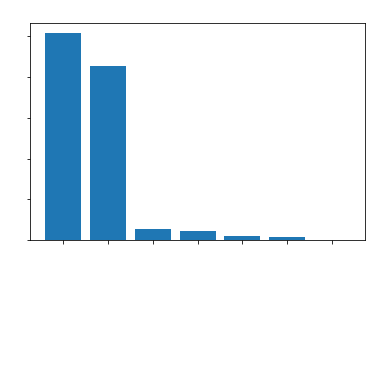

In [219]:
# 创建图
plt.figure()
plt.title("feature importance",color='white')
plt.bar(range(len(names)), nonzero_sort_num)
plt.xticks(range(len(names)), names, rotation=90,color='white')
plt.yticks(color='white')
plt.show()

从图中可以看出温度对酒店客流量的影响最大，这个特征值最重要

In [ ]:
rf.score(X_valid, y_valid)